<h1 align="center"><font size="5"><b>CNN Models with PyTorch</b></font></h1>

# Import Library

In [3]:
# Import torch
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

2.6.0+cu124


## 1. What are 3 areas in industry where computer vision is currently being used?

1. Self-Driving Cars, CV detects and classifies objects like other cars, pedestrians, cyclists, and traffic signs. It also performs lane detection to stay centered and semantic segmentation to understand the difference between the road, sidewalk, and sky.
2. Healthcare Imaging, CV models can be trained to spot subtle anomalies in scans that might be missed by the human eye, leading to earlier diagnosis and treatment for diseases like cancer or diabetic retinopathy.
3. Security & Surveillance (CCTV), CV is used to detect people and malicious activities, including anomaly detection (like someone loitering or a sudden crowd forming), object tracking (following a person or vehicle across multiple cameras), and facial recognition for access control.

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

Overfitting can happen when the models is too complex, but the data is too simple. This leads the model to simply "remembering" the dataset instead of finding patterns from the dataset.

In short, Overfitting occurs when a machine learning model learns the details and noise in its training data to the point that it performs poorly on new, unseen data.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

1. Collect more data: Collect more data helps the model learn the true underlying pattern and ignore statistical noise, which improves its ability to generalize to new situations.
2. Use simpler model: Using a model with fewer parameters and layers reduces its capacity to memorize the specific details and noise in the training data.
3. Do cross-validation: Cross-validation provides a more robust estimate of how model will perform on unseen data by splitting the training dataset into multiple subsets for training and validation.
4. Do feature selection: Removing irrelevant or redundant features reduces the complexity of the data the model learns from, preventing it from finding pattern based on noise.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [4]:
train_dataset = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_dataset = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [5]:
image, label = train_dataset[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
image.shape

torch.Size([1, 28, 28])

In [7]:
len(train_dataset), len(test_dataset)

(60000, 10000)

In [8]:
class_names = train_dataset.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [9]:
random_idx = torch.randint(0, len(train_dataset), size=[1]).item()
random_idx

36219

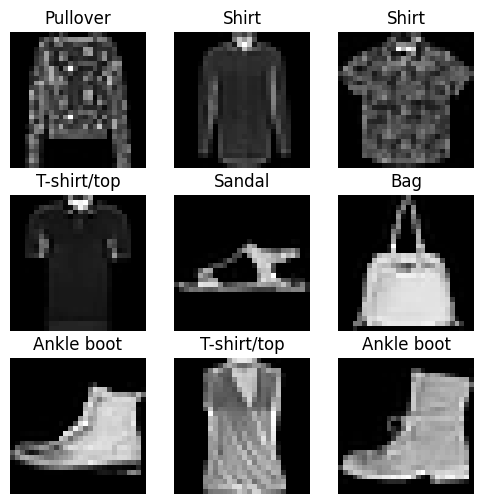

In [10]:
fig = plt.figure(figsize=(6, 6))
rows, cols = 3, 3

for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_dataset), size=[1]).item()
    image, label = train_dataset[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(image.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [11]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(
    dataset=train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_dataloader = DataLoader(
    dataset=test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False
)

In [12]:
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [13]:
class FashionMNISTTVGG(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_features: int, hidden_units: int, output_features: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_features,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*4*4,
                      out_features=output_features)
        )

    def forward(self, x: torch.Tensor):
        return self.classifier(self.block_2(self.block_1(x)))

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [46]:
def train_step(model: nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device):
    train_loss, train_acc = 0, 0

    for batch, (X, y) in enumerate(dataloader):
        # Send data to device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_preds = model(X)

        # 2. Calculate the loss and accuracy
        loss = loss_fn(y_preds, y)
        train_loss += loss
        train_acc += accuracy_fn(preds=y_preds.argmax(dim=1), target=y)

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate the loss and accuracy per epoch and print out what's happening
    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    print(f"Train Loss: {train_loss:.5f} | Train Accuracy: {train_acc:.5f}")

def test_step(model: nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: nn.Module,
               accuracy_fn,
               device: torch.device):
    test_loss, test_acc = 0, 0

    model.eval()
    with torch.inference_mode():
        for X, y in dataloader:
            # Send data to device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_preds = model(X)

            # 2. Calculate the loss and accuracy
            loss = loss_fn(test_preds, y)
            test_loss += loss
            test_acc += accuracy_fn(preds=test_preds, target=y)

        # Re-calculate the metrics and print out
        test_loss /= len(dataloader)
        test_acc /= len(dataloader)
        print(f"Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.5f}")

In [47]:
!pip install torchmetrics

In [48]:
from timeit import default_timer as timer
from tqdm.auto import tqdm
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [51]:
torch.manual_seed(42)

CNN_model_cpu = FashionMNISTTVGG(1, 10, len(class_names))
CNN_model_cpu

FashionMNISTTVGG(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=160, out_features=10, bias=True)
  )
)

In [52]:
torch.cuda.manual_seed(42)

CNN_model_gpu = FashionMNISTTVGG(1, 10, len(class_names)).to(device)
CNN_model_gpu

FashionMNISTTVGG(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=160, out_features=10, bias=True)
  )
)

In [61]:
# Define loss, optimizer, and accuracy function
from torchmetrics import Accuracy
loss_fn = nn.CrossEntropyLoss()
optimizer_cpu = torch.optim.Adam(params=CNN_model_cpu.parameters(), lr=0.001)
cpu_accuracy_fn = Accuracy(task="multiclass", num_classes=len(class_names))

optimizer_gpu = torch.optim.Adam(params=CNN_model_gpu.parameters(), lr=0.001)
gpu_accuracy_fn = Accuracy(task="multiclass", num_classes=len(class_names)).to(device)

In [63]:
# Training on CPU
cpu_start_time = timer()

epochs = 5
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n--------")
    # Training
    train_step(model=CNN_model_cpu,
               dataloader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer_cpu,
               accuracy_fn=cpu_accuracy_fn,
               device="cpu")

    test_step(model=CNN_model_cpu,
              dataloader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=cpu_accuracy_fn,
              device="cpu")

cpu_end_time = timer()
cpu_total_train_time = print_train_time(start=cpu_start_time,
                                        end=cpu_end_time,
                                        device="cpu")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
--------
Train Loss: 0.64988 | Train Accuracy: 0.75432
Test Loss: 0.50945 | Test Accuracy: 0.81619
Epoch: 1
--------
Train Loss: 0.44751 | Train Accuracy: 0.83807
Test Loss: 0.43696 | Test Accuracy: 0.84315
Epoch: 2
--------
Train Loss: 0.39997 | Train Accuracy: 0.85410
Test Loss: 0.41184 | Test Accuracy: 0.85413
Epoch: 3
--------
Train Loss: 0.37247 | Train Accuracy: 0.86538
Test Loss: 0.38062 | Test Accuracy: 0.86462
Epoch: 4
--------
Train Loss: 0.35348 | Train Accuracy: 0.87100
Test Loss: 0.37302 | Test Accuracy: 0.86721
Train time on cpu: 190.793 seconds


In [64]:
# Training on GPU
gpu_start_time = timer()

epochs = 5
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n--------")
    # Training
    train_step(model=CNN_model_gpu,
               dataloader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer_gpu,
               accuracy_fn=gpu_accuracy_fn.to(device),
               device=device)

    test_step(model=CNN_model_gpu,
              dataloader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=gpu_accuracy_fn.to(device),
              device=device)

gpu_end_time = timer()
gpu_total_train_time = print_train_time(start=gpu_start_time,
                                        end=gpu_end_time,
                                        device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
--------
Train Loss: 0.62417 | Train Accuracy: 0.76930
Test Loss: 0.47100 | Test Accuracy: 0.82837
Epoch: 1
--------
Train Loss: 0.42911 | Train Accuracy: 0.84485
Test Loss: 0.41678 | Test Accuracy: 0.85184
Epoch: 2
--------
Train Loss: 0.38379 | Train Accuracy: 0.86113
Test Loss: 0.38503 | Test Accuracy: 0.86062
Epoch: 3
--------
Train Loss: 0.35557 | Train Accuracy: 0.87093
Test Loss: 0.36709 | Test Accuracy: 0.86751
Epoch: 4
--------
Train Loss: 0.33554 | Train Accuracy: 0.87912
Test Loss: 0.34753 | Test Accuracy: 0.87500
Train time on cuda: 82.063 seconds


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [65]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [88]:
import random
# random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_dataset), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


In [89]:
# Make predictions using CNN_model_gpu
pred_probs = make_predictions(model=CNN_model_gpu, data=test_samples)

# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 6, 6, 6, 3, 1, 4, 0, 6])

In [90]:
# Are our predictions in the same form as our test labels?
test_labels, pred_classes

([5, 6, 6, 4, 3, 1, 4, 6, 6], tensor([5, 6, 6, 6, 3, 1, 4, 0, 6]))

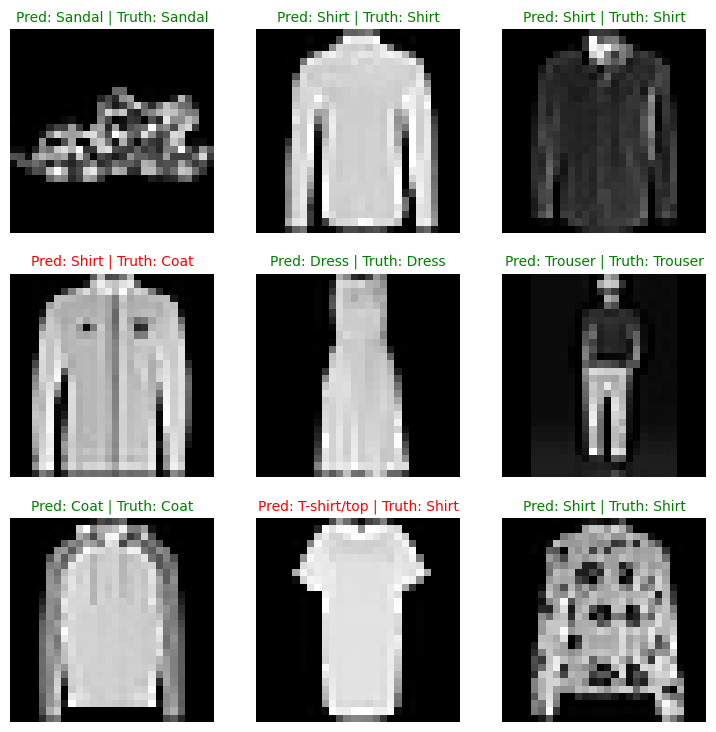

In [91]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

## a. Making predictions on test dataset with our model

In [92]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
CNN_model_gpu.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = CNN_model_gpu(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

## b. Making confusion matrix using torchmetrics.ConfusionMatrix, then plot the confusion matrix using mlxtend.plotting.plot_confusion_matrix().

In [93]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.4


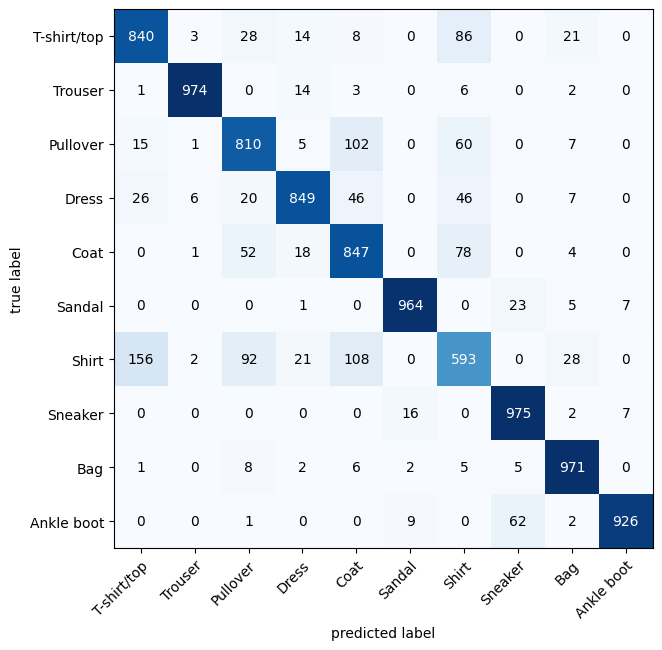

In [94]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_dataset.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [105]:
torch.manual_seed(42)

tensor_1 = torch.randint(0, 255, [64, 64]).unsqueeze(dim=0)
tensor_2 = torch.randint(0, 255, [64, 64]).unsqueeze(dim=0)
tensor_3 = torch.randint(0, 255, [64, 64]).unsqueeze(dim=0)

rand_image = torch.concat([tensor_1, tensor_2, tensor_3], dim=0)
rand_image.shape

torch.Size([3, 64, 64])

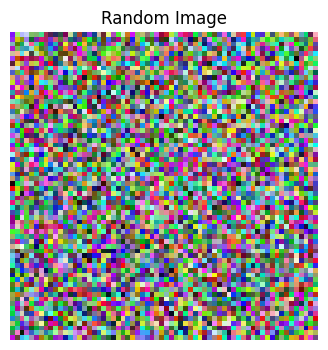

In [106]:
# Plot the rand_image

plt.figure(figsize=(4,4))

plt.imshow(rand_image.permute(1, 2, 0))

plt.title("Random Image")
plt.axis(False);

In [117]:
torch.manual_seed(42)

conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)

# Convert the input tensor to float type
conv_layer(rand_image.float()).shape
# [3, 64, 64] --> [10, 62, 62]
# 10 is the out_channels of conv_layer,
# 64 --> 62 is because the conv_layer doesn't have padding, and using stride=1 with kernel_size=3

# Padding up --> shape larger
# Stride up --> shape smaller
# Kernel size up --> shape smaller

torch.Size([10, 62, 62])

## 13. Conclusion:
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

Yes, there's some data labeling error on the dataset. For example, I have found out that some "dress" like picture being labeled as "coat", "shirt" like picture being labeled as "coat", etc. Also, the labels of the data quite too close to each other, like "Shirt" and "T-shirt/top", "Ankle boot" and "Senaker", "Shirt" and "Coat", etc.

# Key Lesson:
* **Garbage In, Garbage Out**: No matter how good a model is, its performance won't improve with poor data. This is just like our own learning path: no matter how well we study, if the learning materials are low-quality, our results will be poor. So, choose a right materials and teachers!

* The most common mistakes in PyTorch are:
    1. **Shape mismatch**: This often happens when we're working with images (NCHW vs NHWC, squeeze and unsqueeze).
    2. **Datatype mismatch**: This often happens with loss functions or specific operations, requiring you to ensure your tensors are the correct dtype (e.g., torch.float vs torch.Long)
    3. **Device mismatch**: This teaches the habit of being explicit about where your model and your data live.
    
    No matter how skilled we are, we're all human and can make mistakes. The important thing is that it's okay, as long as we learn from them.

* PyTorch CV Workflow:
1. **Preparing the dataset**: Set up device-agnostic code (cpu or cuda), load the dataset (typically using torchvision.datasets), and apply any necessary transforms for data augmentation and normalization (like ToTensor()). Finally, wrap the dataset in a DataLoader to create iterable batches for training and testing.
2. **Build the model**: Define a neural network architecture model (a class that inherits from nn.Module), then instantiate this model and send it to the target device. After that, define the loss function (nn.CrossEntropyLoss for multiclass and nn.BCELoss for binary class), optimizer (usually torch.optim.SGD or torch.optim.Adam), and any performance metrics like accuracy.
3. **Build Training loop**:
    - train_step() function: a function that takes a model, a DataLoader, a loss function, and an optimizer. Its job is to perform one epoch of training: it loops over the DataLoader, performs the forward pass, calculates the loss, clear the optimizer (optimizer.zero_grad), does backpropagation (loss.backward()), and updates the weights (optimizer.step()). It should return the average loss and accuracy for the epoch.
    - test_step() function: a function that takes a model, a DataLoader, and a loss function. Its job is to evaluate the model on the test data. It should use torch.inference_mode() to be more efficient and to ensure no gradients are updated. It should return the average test loss and accuracy.
4. **Fit the model and make predictions**: Create the main training loop that iterates for a set number of epochs. In each epoch, call the train_step() and test_step() functions for their respective DataLoaders, printing the results to monitor the model's performance in real-time.
5. **Evaluate the model**: After training is complete, perform a comprehensive evaluation on the test set. Use tools like torchmetrics to calculate quantitative metrics (e.g., accuracy, precision, F1-score) and visualize the results qualitatively with a confusion matrix.
6. **Experiment with the model**: "Hyperparameter Tuning" in Deep Learning, experiment with the hyperparameter of the model, involves adjusting variables like the learning rate, batch size, optimizer type, or model architecture. Use tools like TensorBoard to log and compare the results of these experiments.
7. **Save the model**: Save the best model's learned parameters for future use. The best practice is to save the model's state_dict, as it is the most flexible and reliable method for inference and deployment.